In [ ]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()
''''
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
.SPX 2138 non-null float64
dtypes: float64(1)
memory usage: 33.4 KB
''''
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));

In [ ]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
 return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]
#1.59 s ± 41.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

In [ ]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

In [ ]:
ne.set_num_threads(4) #number of cpu core to process parallelized 
%timeit r = ne.evaluate(f)

In [ ]:
import eikon as ek
data = ek.get_timeseries('AAPL.O', fields='*',
start_date='2018-10-18 16:00:00',
end_date='2018-10-18 17:00:00',
interval='tick')
data

In [ ]:
df, err = ek.get_data(
    instruments = ['GOOG.O','MSFT.O', 'FB.O'],
    fields = ['BID','ASK']
)
display(df)

In [ ]:
import re
series = """
'01/18/2014 13:00:00', 100, '1st';
'01/18/2014 13:30:00', 110, '2nd';
'01/18/2014 14:00:00', 120, '3rd'
"""
dt= re.compile("'[0-9/:\s]+'")
result = dt.findall(series)
result

In [ ]:
from datetime import datetime
pydt = datetime.strptime(result[0].replace("'", ""),'%m/%d/%Y %H:%M:%S')
print(pydt)

In [ ]:
class FinancialInstrument(object):
 author = 'Yves Hilpisch'
 def __init__(self, symbol, price):
  self.symbol = symbol
  self.price = price

class FinancialInstrument(FinancialInstrument):#inheritence
 def get_price(self):
  return self.price
 def set_price(self, price):
  self.price = price

In [ ]:
fi = FinancialInstrument('AAPL', 100)
fi.get_price()

In [ ]:
fi.set_price(150)
fi.get_price()

In [ ]:
class FinancialInstrument(object):
 def __init__(self, symbol, price):
  self.symbol = symbol
  self.__price = price
 def get_price(self):
  return self.__price
 def set_price(self, price):
  self.__price = price

In [ ]:
fi = FinancialInstrument('AAPL', 100)
fi.get_price()
fi._FinancialInstrument__price
fi._FinancialInstrument__price = 105
fi.set_price(100)

In [ ]:
class PortfolioPosition(object):
 def __init__(self, financial_instrument, position_size):
  self.position = financial_instrument
  self.__position_size = position_size
 def get_position_size(self):
  return self.__position_size
 def update_position_size(self, position_size):
  self.__position_size = position_size
 def get_position_value(self):
  return self.__position_size * self.position.get_price()

In [ ]:
pp = PortfolioPosition(fi, 10)
pp.get_position_value()
pp.position.get_price()
pp.position.set_price(105)

In [ ]:
class Vector(object):
    
 def __init__(self, x=0, y=0, z=0):
  self.x = x
  self.y = y
  self.z = z

 def __repr__(self):
  return 'Vector(%r, %r, %r)' % (self.x, self.y, self.z)

 def __abs__(self):
  return (self.x ** 2 + self.y ** 2 + self.z ** 2) ** 0.5

 def __bool__(self):
  return bool(abs(self))

 def __add__(self, other):
  x = self.x + other.x
  y = self.y + other.y
  z = self.z + other.z
  return Vector(x, y, z)

 def __mul__(self, scalar):
  return Vector(self.x * scalar, self.y * scalar, self.z * scalar)

 def __len__(self):
  return 3

 def __getitem__(self, i):
  if i in [0, -3]: return self.x
  elif i in [1, -2]: return self.y
  elif i in [2, -1]: return self.z
  else: raise IndexError('Index out of range.')
        
 def __iter__(self):
  for i in range(len(self)):
   yield self[i]

In [ ]:
v = Vector(1, 2, 3)
for i in range(3):
 print(v[i])
for coordinate in v:
 print(coordinate)

In [ ]:
pip install plotly==5.1.0

In [ ]:
pip install cufflinks

In [ ]:
pip install dash

# Plotly making intractive plots 

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

In [2]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',freq='B',periods=len(a))
df = pd.DataFrame(100 + 5 * a,columns=list('abcde'),index=index)

In [3]:
plyo.iplot(df.iplot(asFigure=True),image='png',filename='ply_01')

In [4]:
plyo.iplot(
df[['a', 'b']].iplot(asFigure=True,
theme='polar',
title='A Time Series Plot',
xTitle='date',
yTitle='value',
mode={'a': 'markers', 'b': 'lines+markers'},
symbol={'a': 'circle', 'b': 'diamond'},
size=3.5,
colors={'a': 'blue', 'b': 'magenta'},
),
image='png',filename='ply_02')

In [5]:
plyo.iplot(df.iplot(kind='hist',subplots=True,bins=15,asFigure=True),image='png',filename='ply_03')

In [6]:
raw = pd.read_csv('IranKhodro.csv',index_col=1, parse_dates=True)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4235 entries, 2021-08-01 to 2001-03-25
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   4235 non-null   object 
 1   <FIRST>    4235 non-null   float64
 2   <HIGH>     4235 non-null   float64
 3   <LOW>      4235 non-null   float64
 4   <CLOSE>    4235 non-null   float64
 5   <VALUE>    4235 non-null   int64  
 6   <VOL>      4235 non-null   int64  
 7   <OPENINT>  4235 non-null   int64  
 8   <PER>      4235 non-null   object 
 9   <OPEN>     4235 non-null   float64
 10  <LAST>     4235 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 363.9+ KB


In [8]:
raw.describe().round(2)

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,4235.00,4235.00,4235.00,4235.00,4.235000e+03,4.235000e+03,4235.00,4235.00,4235.00
mean,3148.62,3197.53,3098.24,3151.65,2.166762e+11,6.405683e+07,3091.81,3148.73,3144.96
std,1783.58,1818.65,1737.32,1777.23,1.010871e+12,2.787665e+08,11592.80,1773.08,1774.15
min,860.00,870.00,842.00,855.00,1.344200e+06,1.100000e+03,2.00,587.00,851.00
25%,2100.00,2130.50,2054.50,2102.50,2.021417e+09,7.399325e+05,232.00,2102.50,2093.00
50%,2775.00,2820.00,2735.00,2772.00,9.090253e+09,3.249510e+06,463.00,2771.00,2770.00
75%,3405.00,3450.00,3358.50,3410.00,4.968015e+10,1.701414e+07,1493.50,3410.00,3405.00
max,13037.00,13450.00,12481.00,12835.00,1.500004e+13,3.695050e+09,153512.00,12835.00,12750.00


In [9]:
quotes = raw[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]
quotes = quotes.iloc[-60:]
quotes.tail()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
<DTYYYYMMDD>,,,,
2001-03-31,2849.0,2848.0,2800.0,2838.0
2001-03-28,2795.0,2849.0,2796.0,2849.0
2001-03-27,2798.0,2800.0,2795.0,2795.0
2001-03-26,2800.0,2810.0,2797.0,2798.0
2001-03-25,2798.0,2802.0,2798.0,2800.0


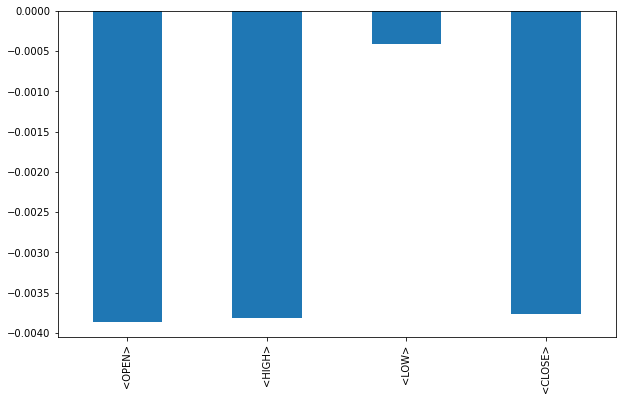

In [10]:
quotes.diff().head()
quotes.diff().mean()
quotes.pct_change().round(3).head()#pct_change() calculates the percentage change between two index values.
quotes.pct_change().mean().plot(kind='bar', figsize=(10, 6));

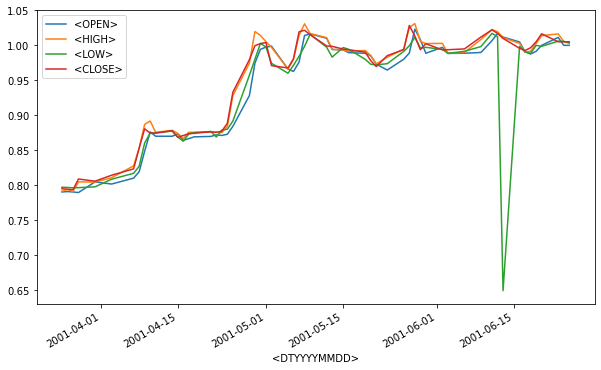

In [11]:
rets = np.log(quotes / quotes.shift(1))
rets.head().round(3)
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

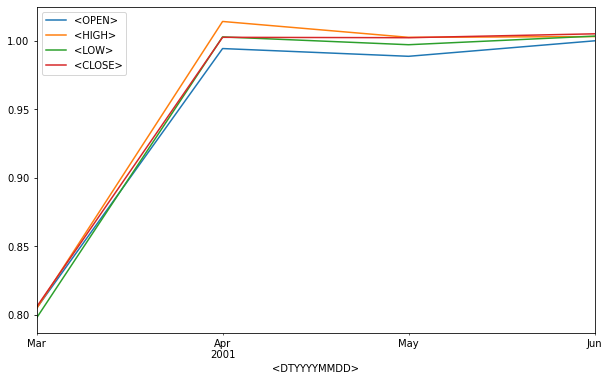

In [12]:
quotes.resample('1w', label='right').last().head()
quotes.resample('1m', label='right').last().head()
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6));

In [13]:
qf = cf.QuantFig(quotes,title='ایران-خودرو',legend='top',name='خودرو')
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_01')

In [14]:
qf.add_bollinger_bands(periods=15,boll_std=2)
qf.add_rsi(periods=14,showbands=False)
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_02')


In [ ]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import pickle
import numpy as np
from random import gauss
a = [gauss(1.5, 2) for i in range(1000000)]
path = '/Users/BB/'
pkl_file = open(path + 'data.pkl', 'wb')

In [ ]:
%time pickle.dump(a, pkl_file)
pkl_file.close()
pkl_file = open(path + 'data.pkl', 'rb')
%time b = pickle.load(pkl_file)
a[:3]
b[:3]
np.allclose(np.array(a), np.array(b))

In [ ]:
pkl_file = open(path + 'data.pkl', 'wb')
%time pickle.dump(np.array(a), pkl_file)
%time pickle.dump(np.array(a) ** 2, pkl_file)
pkl_file.close()

In [ ]:
pkl_file = open(path + 'data.pkl', 'rb')
x = pickle.load(pkl_file)
x[:4]
y = pickle.load(pkl_file)
y[:4]
pkl_file.close()

In [ ]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)
pkl_file.close()
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
 print(key, data[key][:4])

In [ ]:
import pandas as pd
rows = 5000
a = np.random.standard_normal((rows,5)).round(4)
t = pd.date_range(start='2021/01/01' , periods=rows , freq='H')
csv_file = open(path+'NormData.csv','w')
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)
for t_,(no1,no2,no3,no4,no5) in zip(t,a):
    s='{},{},{},{},{},{}\n'.format(t_,no1,no2,no3,no4,no5)
    csv_file.write(s)
csv_file.close()

In [ ]:
csv_file = open(path+'NormData.csv','r')
for i in range(5):
    print(csv_file.readline(),end = '')
csv_file.close()

csv_file = open(path+'NormData.csv','r')
contents= csv_file.readlines()
contents[:5]
csv_file.close()

In [ ]:
import csv
with open(path+'NormData.csv','r') as f:
    csv_reader = csv.reader(f)
    lines= [line for line in csv_reader]
lines[:5]

In [ ]:
import csv
with open(path+'NormData.csv','r') as f:
    csv_reader = csv.DictReader(f)
    lines= [line for line in csv_reader]
lines[:5]

In [ ]:
import sqlite3 as sq3

In [ ]:
con = sq3.connect(path + 'numbs.db')
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
con.execute(query)
con.commit()
q = con.execute
q('SELECT * FROM sqlite_master').fetchall()

import datetime
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?,?,?)',(now,0.12,12.3))
np.random.seed(100)
data = np.random.standard_normal((10000,2)).round(4)
%time 
for row in data:
    now= datetime.datetime.now()
    q('INSERT INTO numbs VALUES (?,?,?)',(now,row[0],row[1]))
con.commit()
q('SELECT * FROM numbs').fetchmany(4)
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4)

pointer = q('SELECT * FROM numbs')
for i in range(3):
    print(pointer.fetchone())
    
rows = pointer.fetchall()
rows[:3]

q('DROP TABLE IF EXISTS numbs')
con.close()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

In [2]:
IrankhodrRaw = pd.read_csv('Iran.Khodro.csv',index_col = 1,parse_dates = True)

In [3]:
IrankhodrRaw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4238 entries, 2021-08-04 to 2001-03-25
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   4238 non-null   object 
 1   <FIRST>    4238 non-null   float64
 2   <HIGH>     4238 non-null   float64
 3   <LOW>      4238 non-null   float64
 4   <CLOSE>    4238 non-null   float64
 5   <VALUE>    4238 non-null   int64  
 6   <VOL>      4238 non-null   int64  
 7   <OPENINT>  4238 non-null   int64  
 8   <PER>      4238 non-null   object 
 9   <OPEN>     4238 non-null   float64
 10  <LAST>     4238 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 364.2+ KB


In [4]:
IrankhodrRaw.drop('<TICKER>' , axis = 'columns')
IrankhodrLast = IrankhodrRaw['<LAST>']
IrankhodrLast[-6::5]
#IrankhodrLast.tail()

<DTYYYYMMDD>
2001-04-03    2868.0
2001-03-25    2800.0
Name: <LAST>, dtype: float64

In [9]:
def weeks_maker(dfDaysSeries):
    for j in range(int(len(dfDaysSeries)/5)):
         IrankhodroWeeks[j] = (IrankhodrLast[j] + IrankhodrLast[j+1]+IrankhodrLast[j+2] + IrankhodrLast[j+3]+IrankhodrLast[j+4]).mean()
        


In [69]:
ax

3083.096462435727

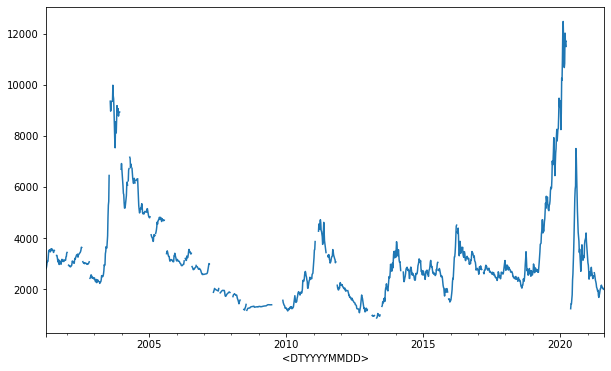

In [35]:
# forming weekly,yearly data form daily data and making PersianBussinessCalender

for j in range(0,int(len(IrankhodrLast)/5),5):
    IrankhodroWeeks[j] = pd.Series((IrankhodrLast[j] + IrankhodrLast[j+1]+IrankhodrLast[j+2] + IrankhodrLast[j+3]+IrankhodrLast[j+4])/5,index = IrankhodrLast.index)
IrankhodroWeeks.head(20)

pd.bdate_range(start='2001-03-25',end = '2021-08-01',freq= 'C',weekmask='Sat Sun Mon Tue Wed' , name = 'PersianBusCalender')

#ax = IrankhodrLast.resample('Y',label = 'right').mean()
#ax = ax[:].mean()
#IrankhodrLast.resample('Y',label = 'right').mean().plot(kind = 'bar',figsize = (10,6))
IrankhodrLast.resample('5D',label = 'right').mean().plot(figsize = (10,6))

[Timestamp('2021-08-09 00:00:00'),
 Timestamp('2021-08-08 00:00:00'),
 Timestamp('2021-08-07 00:00:00'),
 Timestamp('2021-08-06 00:00:00'),
 Timestamp('2021-08-05 00:00:00'),
 Timestamp('2021-07-23 00:00:00'),
 Timestamp('2021-07-22 00:00:00'),
 Timestamp('2021-07-19 00:00:00'),
 Timestamp('2021-07-18 00:00:00'),
 Timestamp('2021-07-17 00:00:00'),
 Timestamp('2021-07-16 00:00:00'),
 Timestamp('2021-07-15 00:00:00'),
 Timestamp('2021-07-12 00:00:00'),
 Timestamp('2021-07-11 00:00:00'),
 Timestamp('2021-07-10 00:00:00'),
 Timestamp('2021-07-09 00:00:00'),
 Timestamp('2021-07-08 00:00:00'),
 Timestamp('2021-07-05 00:00:00'),
 Timestamp('2021-07-04 00:00:00'),
 Timestamp('2021-07-03 00:00:00'),
 Timestamp('2021-07-02 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-06-28 00:00:00'),
 Timestamp('2021-06-27 00:00:00'),
 Timestamp('2021-06-26 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-06-24 00:00:00'),
 Timestamp('2021-06-21 00:00:00'),
 Timestamp('2021-06-

In [ ]:
# Algorithmic Trading  SMA_Method

In [8]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [9]:
'''
Iran.Kh..Inv..csv
Iran.Khodro.csv
Jahrom.Power.Plant.csv
'''

raw = pd.read_csv('Jahrom.Power.Plant.csv',index_col=1, parse_dates=True)

In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2021-08-04 to 2019-09-25
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   441 non-null    object 
 1   <FIRST>    441 non-null    float64
 2   <HIGH>     441 non-null    float64
 3   <LOW>      441 non-null    float64
 4   <CLOSE>    441 non-null    float64
 5   <VALUE>    441 non-null    int64  
 6   <VOL>      441 non-null    int64  
 7   <OPENINT>  441 non-null    int64  
 8   <PER>      441 non-null    object 
 9   <OPEN>     441 non-null    float64
 10  <LAST>     441 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 37.9+ KB


In [11]:
symbol = '<CLOSE>'
data = (pd.DataFrame(raw[symbol]).dropna())
#data = data[:365]
#print(data)

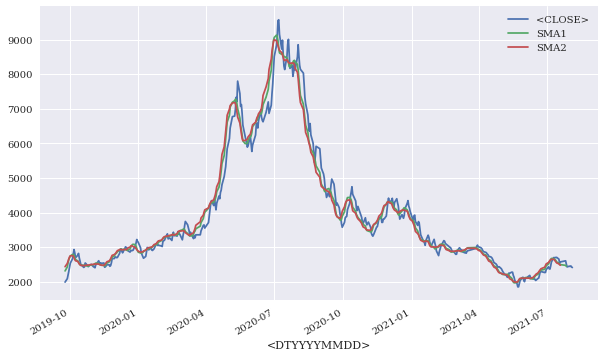

In [12]:
SMA1 = 7
SMA2 = 9
#SMA3 = 205
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()
#data['SMA3'] = data[symbol].rolling(SMA3).mean()
data.plot(figsize=(10, 6));

In [13]:
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], -1, 1)
data.tail()

,<CLOSE>,SMA1,SMA2,Position
<DTYYYYMMDD>,,,,
2019-10-01,2417.0,2695.857143,2717.666667,1
2019-09-30,2302.0,2640.000000,2660.111111,1
2019-09-29,2193.0,2548.428571,2596.222222,1
2019-09-28,2089.0,2428.142857,2529.111111,1
2019-09-25,1990.0,2313.000000,2435.333333,1


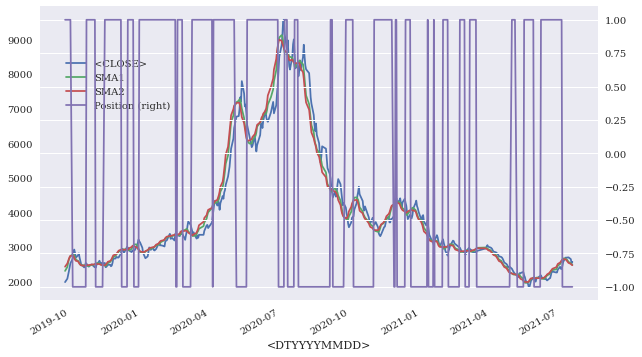

In [14]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));


In [15]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.round(4).head()

,<CLOSE>,SMA1,SMA2,Position,Returns,Strategy
<DTYYYYMMDD>,,,,,,
2021-07-19,2574.0,2495.2857,2478.3333,-1,NaN,NaN
2021-07-18,2535.0,2506.4286,2492.0000,-1,-0.0153,0.0153
2021-07-17,2654.0,2536.5714,2517.3333,-1,0.0459,-0.0459
2021-07-14,2706.0,2573.0000,2545.0000,-1,0.0194,-0.0194
2021-07-13,2699.0,2611.5714,2573.4444,-1,-0.0026,0.0026


In [16]:
data.dropna(inplace=True)
np.exp(data[['Returns', 'Strategy']].sum())

Returns     0.773116
Strategy    0.848167
dtype: float64

In [17]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.509948
Strategy    0.510000
dtype: float64

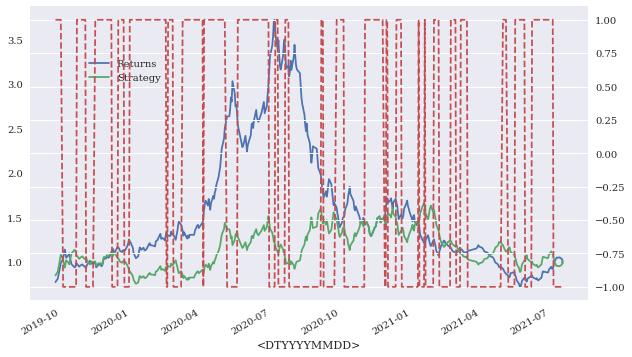

In [18]:
ax = data[['Returns', 'Strategy']].cumsum(
).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [19]:
#data.where((data['Position'][i]+(data['Position'][i+1]) == 0))
for i in range(159):
    if data['Position'][i]/data['Position'][i+1] <0:
        print(data.index[i])

#data['Position']

2021-07-06 00:00:00
2021-06-08 00:00:00
2021-05-30 00:00:00
2021-05-17 00:00:00
2021-05-08 00:00:00
2021-05-01 00:00:00
2021-03-16 00:00:00
2021-03-07 00:00:00
2021-03-01 00:00:00
2021-02-22 00:00:00
2021-02-07 00:00:00
2021-01-31 00:00:00
2021-01-20 00:00:00
2021-01-19 00:00:00
2021-01-12 00:00:00
2021-01-11 00:00:00
2020-12-20 00:00:00
2020-12-13 00:00:00
2020-12-02 00:00:00
2020-11-30 00:00:00
2020-11-28 00:00:00


In [6]:
from itertools import product
sma1 = range(1, 8)
sma2 = range(9, 56)
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(raw[symbol])
    #data = data[:252]
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], -1, 1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
      {'SMA1': SMA1, 'SMA2': SMA2,
       'MARKET': perf['Returns'],
       'STRATEGY': perf['Strategy'],
       'OUT': perf['Strategy'] - perf['Returns']},
       index=[0]), ignore_index=True)

In [7]:
results.info()
results.sort_values('OUT', ascending=False).head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      329 non-null    int64  
 1   SMA2      329 non-null    int64  
 2   MARKET    329 non-null    float64
 3   STRATEGY  329 non-null    float64
 4   OUT       329 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 12.9 KB


,SMA1,SMA2,MARKET,STRATEGY,OUT
282,7,9,0.773116,0.848167,0.075051
236,6,10,0.785010,0.841902,0.056892
284,7,11,0.749812,0.728194,-0.021618
283,7,10,0.785010,0.756527,-0.028483
288,7,15,0.740052,0.662963,-0.077089
237,6,11,0.749812,0.655454,-0.094358
287,7,14,0.736219,0.617757,-0.118462
